# California Housing Prices

## Data Exploration

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [107]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Target variable is median_house_value

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [108]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [75]:
data.dropna(inplace=True)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [76]:
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

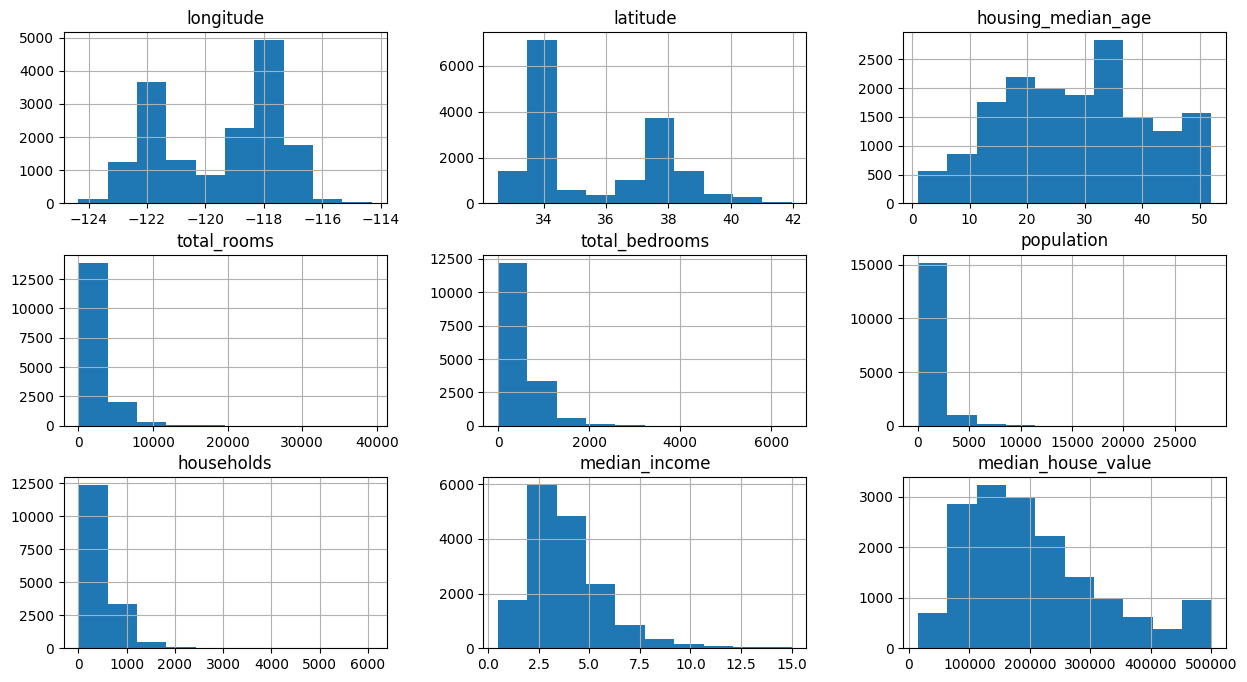

In [77]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(15, 8))

/var/folders/m_/717x69rd7nz8wyvtvlgk_rlm0000gn/T/ipykernel_7870/1811937681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

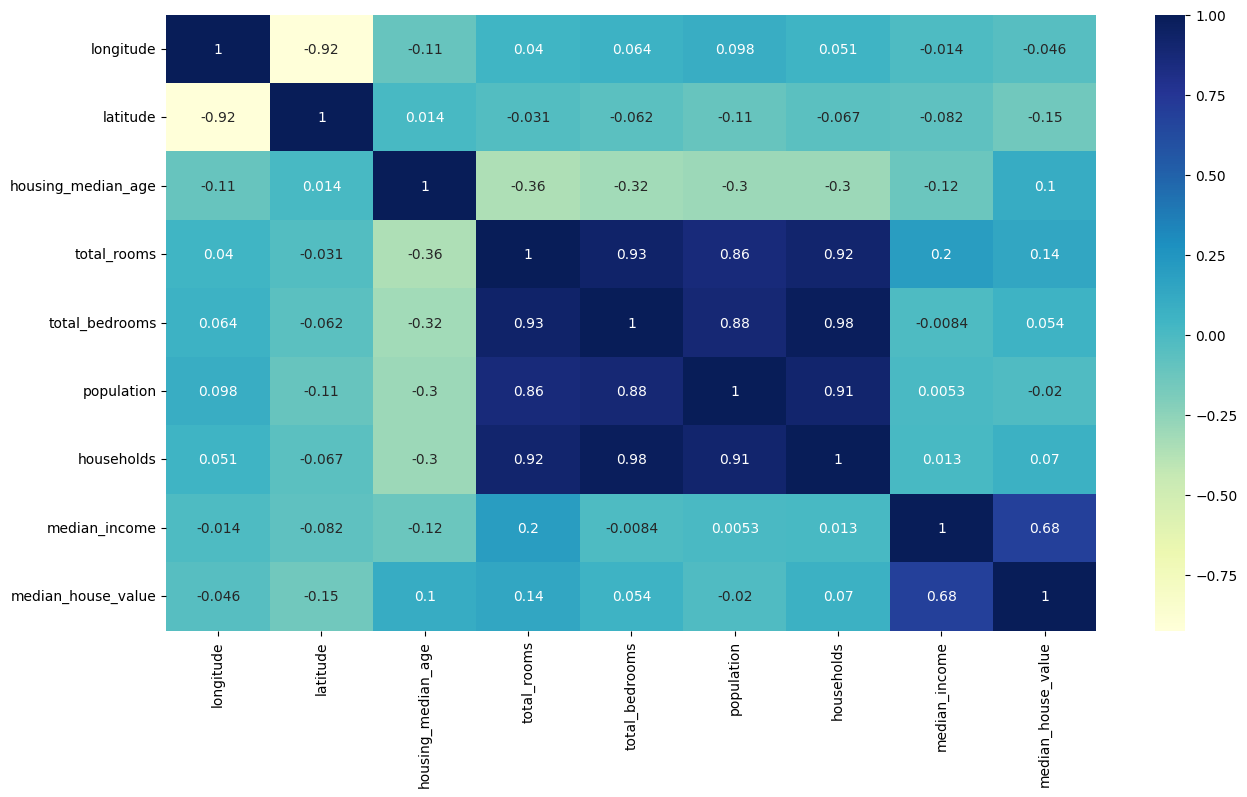

In [78]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Data Preprocessing

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

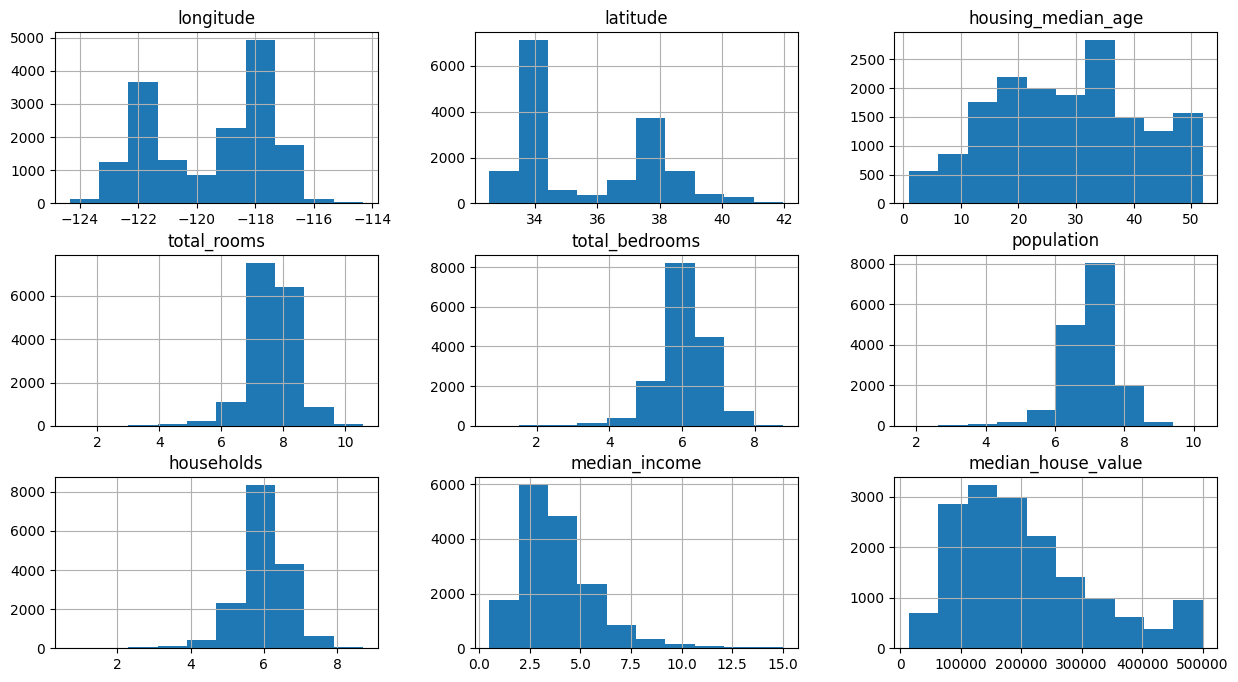

In [79]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

train_data.hist(figsize=(15, 8))

In [80]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2604,-124.06,41.13,22.0,8.090709,6.684612,7.233455,6.361302,2.4708,119400.0,0,0,0,0,1
11951,-117.44,33.94,32.0,7.503841,5.771441,6.806829,5.726848,4.1776,118700.0,0,1,0,0,0
5157,-118.28,33.95,40.0,7.623153,6.289716,7.673688,6.263398,2.1437,94800.0,1,0,0,0,0
149,-122.22,37.80,52.0,7.909122,6.295266,7.078342,6.246107,4.5428,239800.0,0,0,0,1,0
10602,-117.81,33.67,8.0,7.800163,6.220590,7.015712,6.182085,4.6019,242500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027,-117.83,33.80,31.0,7.609367,6.016157,6.999422,6.006353,3.8681,196000.0,1,0,0,0,0
2125,-119.71,36.79,34.0,7.545390,5.780744,6.874198,5.874931,3.6681,82000.0,0,1,0,0,0
2665,-115.52,33.12,38.0,7.191429,5.572154,6.665684,5.446737,1.8793,60800.0,0,1,0,0,0
1551,-121.94,37.75,16.0,8.541300,6.601230,7.809947,6.635947,6.6204,296100.0,1,0,0,0,0


<Axes: >

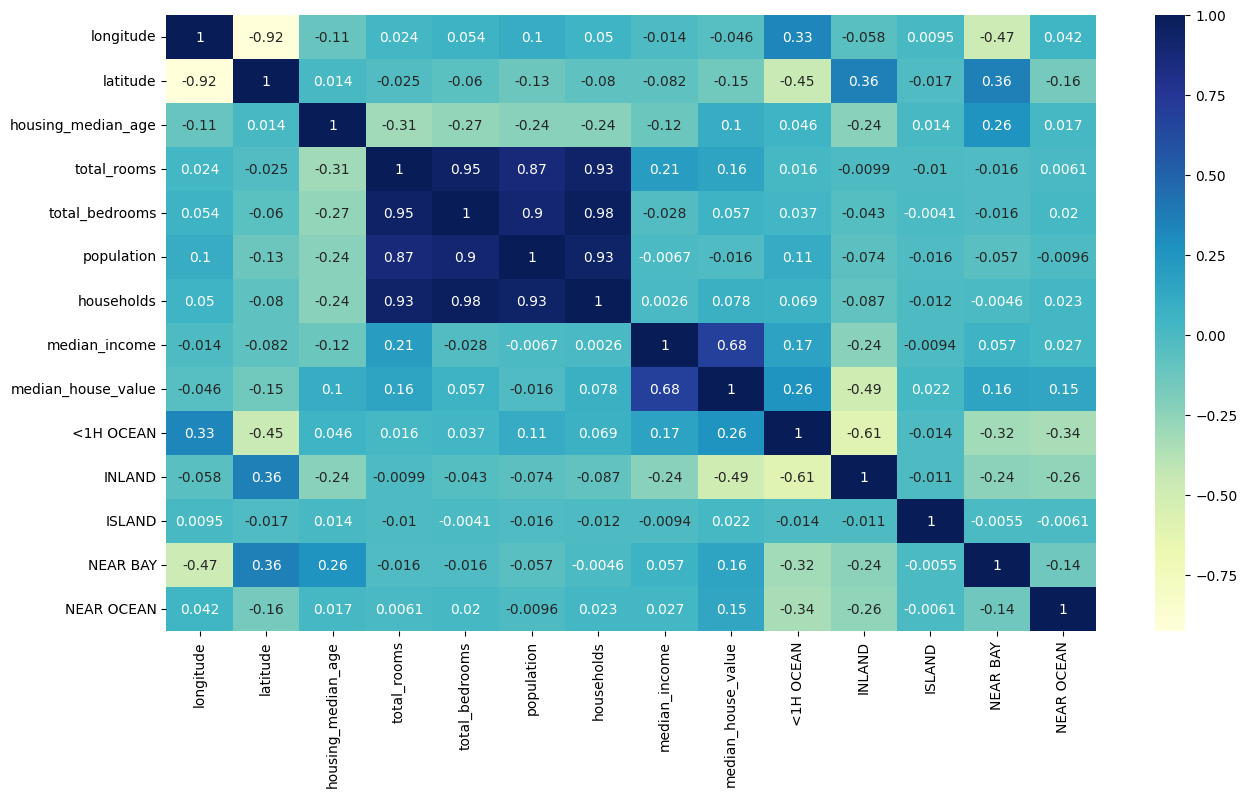

In [81]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

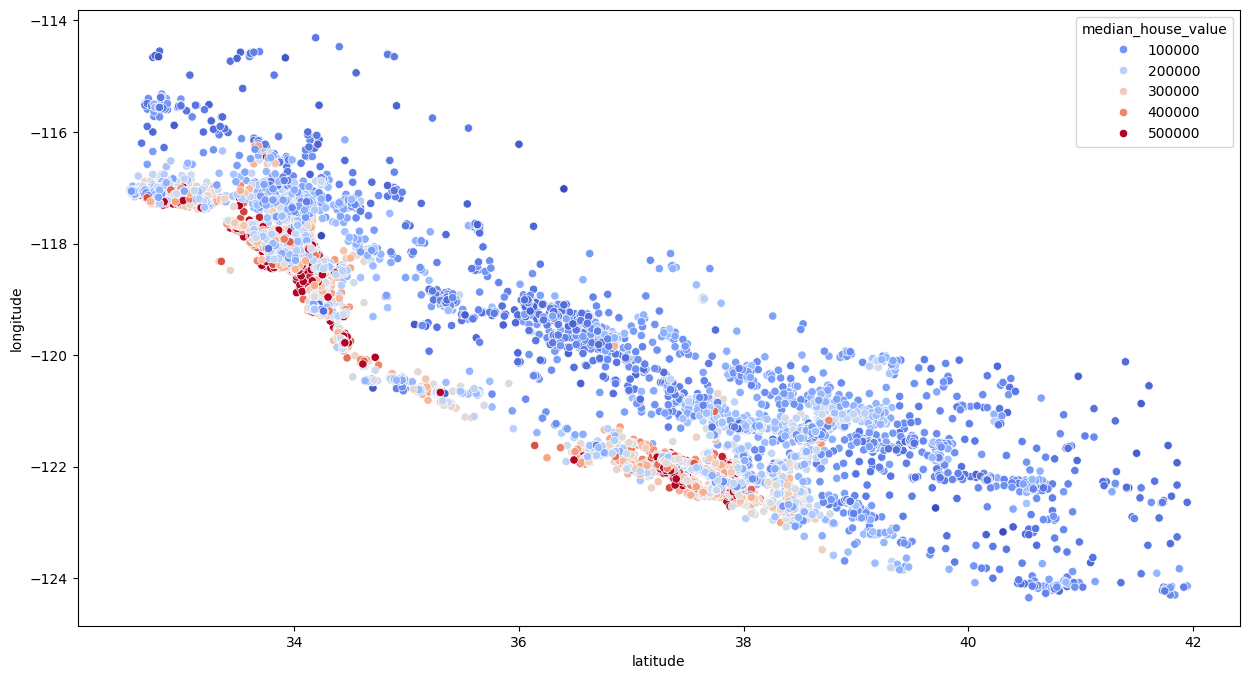

In [82]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x="latitude", y="longitude", hue="median_house_value", palette="coolwarm")

## Data Engineering

In [83]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

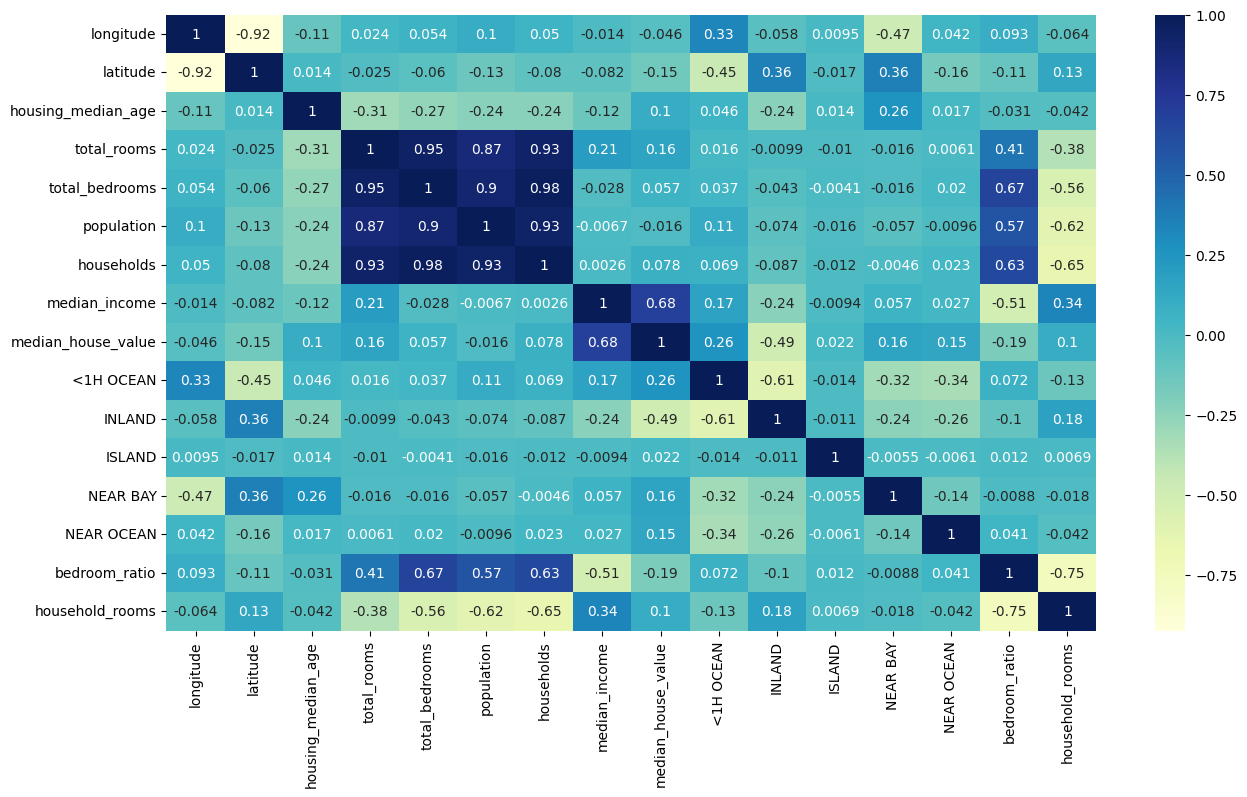

In [84]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Linear Regression Model

In [85]:
scaler = StandardScaler()

X_train = train_data.drop(["median_house_value"], axis=1)
y_train = train_data["median_house_value"]

X_train_scaled = scaler.fit_transform(X_train)

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression()

In [86]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]

X_test = test_data.drop(["median_house_value"], axis=1)
y_test = test_data["median_house_value"]

X_test_scaled = scaler.transform(X_test)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12798,-121.45,38.62,38.0,7.791523,6.406880,7.436617,6.222576,1.4861,63100.0,0,1,0,0,0,0.822289,1.252138
1914,-120.10,38.91,33.0,7.353722,5.645447,3.433987,2.484907,1.8750,500001.0,0,1,0,0,0,0.767699,2.959356
15288,-117.31,33.10,15.0,7.780303,6.102559,6.617403,6.045005,3.5341,500001.0,0,0,0,0,1,0.784360,1.287063
19047,-121.83,38.45,15.0,8.540128,6.655440,7.840313,6.678342,4.8611,146400.0,0,1,0,0,0,0.779314,1.278780
15325,-117.34,33.19,23.0,8.173857,6.317165,7.335634,6.251904,5.2760,224500.0,0,0,0,0,1,0.772850,1.307419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,-117.91,33.64,38.0,7.706613,6.297109,6.973543,6.240276,2.8553,307600.0,1,0,0,0,0,0.817105,1.234980
16936,-122.32,37.56,49.0,7.609367,5.703782,6.539586,5.666427,5.5490,500001.0,0,0,0,0,1,0.749574,1.342886
16979,-122.30,37.56,37.0,7.582229,5.908083,7.145196,5.948035,4.7344,271800.0,0,0,0,0,1,0.779201,1.274745
12161,-117.18,33.78,7.0,7.437206,6.052089,6.695799,5.872118,1.3417,169300.0,0,1,0,0,0,0.813758,1.266529


In [87]:
regression_model.score(X_test_scaled, y_test)

0.6712990094130529

## Random Forest Model

In [93]:
forest_model = RandomForestRegressor()

forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [94]:
forest_model.score(X_test_scaled, y_test)

0.8180891363836609

In [102]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": [2, 4, 6, 8],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(
    forest_model,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True
    )

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [103]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=300)

In [104]:
best_forest = grid_search.best_estimator_

In [105]:
best_forest.score(X_test_scaled, y_test)

0.8213209305923603